In [1]:
import numpy as np
from paik.solver import Solver, DEFAULT_SOLVER_PARAM_M7_NORM

solver = Solver(solver_param=DEFAULT_SOLVER_PARAM_M7_NORM)

WorldModel::LoadRobot: /home/luca/.cache/jrl/temp_urdfs/panda_arm_hand_formatted_link_filepaths_absolute.urdf
joint mimic: no multiplier, using default value of 1 
joint mimic: no offset, using default value of 0 
URDFParser: Link size: 17
URDFParser: Joint size: 12
LoadAssimp: Loaded model /home/luca/miniconda3/lib/python3.9/site-packages/jrl/urdfs/panda/meshes/visual/link0.dae (59388 verts, 20478 tris)
LoadAssimp: Loaded model /home/luca/miniconda3/lib/python3.9/site-packages/jrl/urdfs/panda/meshes/visual/link1.dae (37309 verts, 12516 tris)
LoadAssimp: Loaded model /home/luca/miniconda3/lib/python3.9/site-packages/jrl/urdfs/panda/meshes/visual/link2.dae (37892 verts, 12716 tris)
LoadAssimp: Loaded model /home/luca/miniconda3/lib/python3.9/site-packages/jrl/urdfs/panda/meshes/visual/link3.dae (42512 verts, 14233 tris)
LoadAssimp: Loaded model /home/luca/miniconda3/lib/python3.9/site-packages/jrl/urdfs/panda/meshes/visual/link4.dae (43520 verts, 14620 tris)
LoadAssimp: Loaded model /ho

In [26]:
num_poses = 1
num_sols = 1000

solver.shrink_ratio = 0.0
J, P, F = solver.random_sample_JPF(num_samples=num_poses)

In [27]:
l2_errs = np.zeros((num_poses, num_sols))
ang_errs = np.zeros((num_poses, num_sols))
config_errs = np.zeros((num_poses, num_sols, 7))
config = np.empty((num_poses, num_sols, 7))

pivot = np.random.randint(0, num_sols)

for i, p in enumerate(P):
    F = np.random.rand(num_sols, 1)
    p = np.tile(p, (num_sols, 1))
    J = solver.solve(P=p, F=F, num_sols=1, return_numpy=True)
    config[i] = J.reshape((num_sols, 7))
    l2_errs[i], ang_errs[i] = solver.evaluate_solutions(J, p, return_col=True)
    config_errs[i] = np.abs(config[i] - config[i, pivot])

In [30]:
import pandas as pd

df = pd.DataFrame(
    {
        "l2_errs": l2_errs.flatten(),
        "ang_errs": ang_errs.flatten(),
        "config_errs": config_errs.mean(-1).flatten(),
    }
)

df.query("l2_errs < 0.005").describe()

,l2_errs,ang_errs,config_errs
count,212.000000,212.000000,212.000000
mean,0.002955,0.020073,3.977054
std,0.001113,0.010189,0.335959
min,0.000994,0.005259,3.113898
25%,0.001817,0.014169,3.836945
50%,0.003159,0.020467,3.881081
75%,0.003763,0.024358,4.099815
max,0.004977,0.083939,4.645547


<AxesSubplot: ylabel='Frequency'>

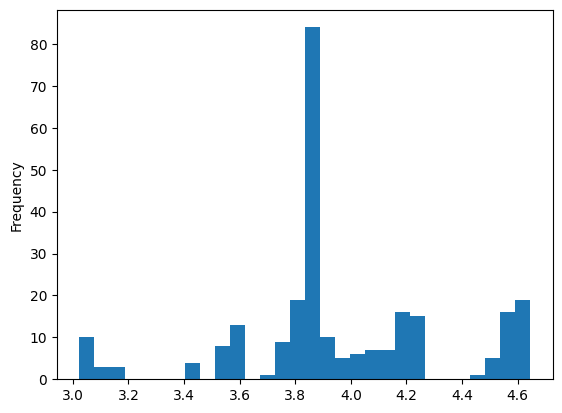

In [31]:
df.query("l2_errs < 0.01")["config_errs"].plot.hist(bins=30)